In [1]:
import numpy as np

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3


a= np.prod(input_shape)
input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

print a, input_size, weight_size


120 240 360


In [5]:
a=(2,2)

x = np.linspace(-0.1, 0.5, 5)
y = np.linspace(-0.1, 0.5, 8).reshape(2,*a)  ## Change tuple to list by *

print x, x.shape
print x[-1]

[-0.1   0.05  0.2   0.35  0.5 ] (5,)
0.5


In [14]:
z = np.array([[1, 2, 3, 4],[5, 6, 7, 8],[9, 10, 11, 12]])
print z
b = z.reshape(2,2,3)
print b
print np.sum(b,axis=(0,2))



[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
[30 48]


In [6]:
x = np.arange(12).reshape(3, 4)
y = np.array([1,2])
print(x)
print(x.reshape(12,''))

p=0.5
mask1 = np.random.rand(*x.shape)
print mask1

mask2 = (np.random.rand(*x.shape) > p)
print mask2

print x*mask2

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


TypeError: an integer is required

In [58]:
a = np.arange(3)
print (a)
a.shape


[0 1 2]


(3,)

In [36]:
a =2
print 'i am %s'%a

i am 2


In [1]:
Wi = 'W'+str(1)

In [2]:
print (Wi)

W1


In [9]:
for a in range(3):
    print a

0
1
2


In [14]:
a = [20 , 30]
b = 2
aa = a + [b]
print aa

[20, 30, 2]


In [20]:
for i in range(5, 0,-1):
    print i

5
4
3
2
1


In [5]:
x = np.linspace(1, 10, 10)
print x
a=5
c=8
x[0,]

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


In [42]:
a = np.arange(2*5**3).reshape(5,2,5,5)
b = np.arange(5)
c = np.arange(16).reshape(2,2,2,2)
'''
for i in xrange(1):
    for j in xrange(1):
        a = np.einsum('ij,jklm->iklm', a[:,:,i,j], c)
        
        print a.shape, a
 '''    
print c[:,:,None, None]  

c[:,:,None, None].shape  

[[[[[[ 0  1]
     [ 2  3]]]]



  [[[[ 4  5]
     [ 6  7]]]]]




 [[[[[ 8  9]
     [10 11]]]]



  [[[[12 13]
     [14 15]]]]]]


(2, 2, 1, 1, 2, 2)

In [3]:
mask = list(range(20))
print mask

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(266, 400, 3)
(1, 319200)
(3, 266, 400)
(2, 3, 266, 266)
(266, 266, 3)


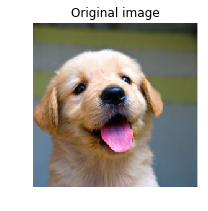

In [49]:
# As usual, a bit of setup
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.cnn import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

from scipy.misc import imread, imresize
kitten, puppy = imread('kitten.jpg'), imread('puppy.jpg')
print (kitten.shape)
kitten1 = kitten.reshape(-1,266*400*3)
print (kitten1.shape)
kitten2 = kitten1.reshape(266,400,3).transpose((2,0,1))
print (kitten2.shape)

img_size = kitten.shape[0] 
x = np.zeros((2, 3, img_size, img_size))
x[0, :, :, :] = imresize(puppy, (img_size, img_size)).transpose((2, 0, 1))
x[1, :, :, :] = imresize(kitten, (img_size, img_size)).transpose((2, 0, 1))
print (x.shape)
x_for_imageshow = x[0, :, :, :].transpose((1,2,0))
print (x_for_imageshow.shape)

def imshow_noax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')

# Show the original images and the results of the conv operation
plt.subplot(2, 3, 1)
imshow_noax(x_for_imageshow, normalize=False)
plt.title('Original image')
